In [7]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
np.random.seed(88)
bank = pd.read_csv("~/banking_data.csv")
#bank.head()
min_max_scaler = preprocessing.MinMaxScaler()

bankX = bank.drop("Bankrupt", 1).copy().values
bankY = bank["Bankrupt"].copy().values
bank_x_df = bank.drop("Bankrupt",1)

bankX = min_max_scaler.fit_transform(bankX)
bankX_df = pd.DataFrame(bankX, columns=bank_x_df.columns)

In [9]:
bankX.shape

(6819, 95)

In [10]:
dims_bank = list(range(2,95,5))

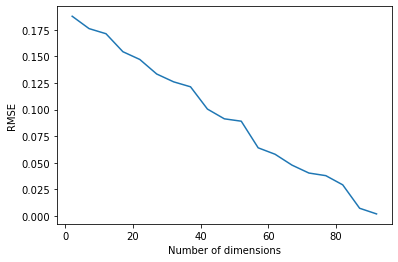

Wall time: 427 ms


In [13]:
%%time
rc_errors = {}
for dim in dims_bank:
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(bankX_df.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(bankX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.show()

In [14]:
HR = pd.read_csv("~//Documents//Assignment3//HR_data.csv")
HR_orig = pd.read_csv("~//Documents//Assignment3//HR_data.csv")

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

HR['city']=HR['city'].astype(str)
HR['gender']=HR['gender'].astype(str)
HR['relevent_experience']=HR['relevent_experience'].astype(str)
HR['enrolled_university']=HR['enrolled_university'].astype(str)
HR['education_level']=HR['education_level'].astype(str)
HR['major_discipline']=HR['major_discipline'].astype(str)
HR['experience']=HR['experience'].astype(str)
HR['company_size']=HR['company_size'].astype(str)
HR['company_type']=HR['company_type'].astype(str)
HR['last_new_job']=HR['last_new_job'].astype(str)
HR = MultiColumnLabelEncoder(columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']).fit_transform(HR)


In [15]:
hrX = HR.drop("target", 1).copy().values
hrY = HR["target"].copy().values
hr_x_df = HR.drop("target",1)
min_max_scaler = preprocessing.MinMaxScaler()
hrX = min_max_scaler.fit_transform(hrX)
hrX_df = pd.DataFrame(hrX, columns=hr_x_df.columns)

In [16]:
dims_hr = list(range(1,15,1))

C:\Users\kelle\anaconda3\lib\site-packages\sklearn\random_projection.py:385: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (13 < 14).The dimensionality of the problem will not be reduced.
  warnings.warn(


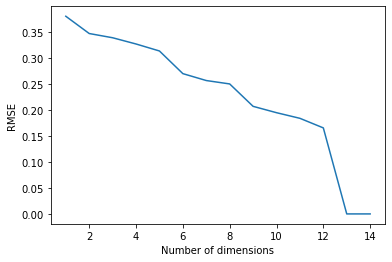

Wall time: 195 ms


In [18]:
%%time
rc_errors = {}
for dim in dims_hr:
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(hrX_df.values)
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(hrX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.show()

In [21]:
comp = 45
grp = GaussianRandomProjection(n_components=comp, random_state=44)
grp_result = grp.fit_transform(bankX_df.values)
for i in range(comp):
    field_name = "grp-"+str(i)
    bankX_df[field_name] = grp_result[:,i]
    bankX_df[field_name] = grp_result[:,i]
bankX_df_grp_45 = grp_result

In [22]:
%%time
best_net = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=75, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Wall time: 0 ns


In [23]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [24]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bankX_df_grp_45, 
                                                    bankY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=bankY)

Wall time: 6.98 ms


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network

Wall time: 5min 48s


C:\Users\kelle\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


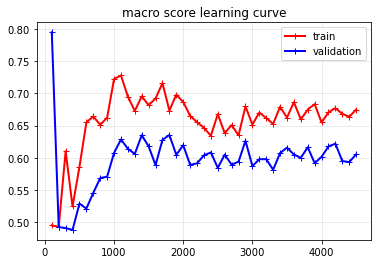

In [25]:
%%time
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, f1_score, 
                      average="macro")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="macro score learning curve")

In [28]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [33]:
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
best_net.fit(X_train, y_train)
test_predictions = best_net.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           0    0.97179   0.99633   0.98390      2178
           1    0.55556   0.13699   0.21978        73

    accuracy                        0.96846      2251
   macro avg    0.76367   0.56666   0.60184      2251
weighted avg    0.95829   0.96846   0.95912      2251

[[2170    8]
 [  63   10]]
